*Project 1 Group 5*

The aim of our project is to uncover opportunities within shorthaul rail in Texas. We'll examine relationships between population projections, emissions, travel time, and other related relationships derived from the data. We'll also examine the impact of the COVID-19 pandemic on shorthaul rail in Texas.

What are the growth rates of Austin and Dallas? What are the existing rail lines connecting the two cities? What is the average fuel consumption for the different modes of transporation for a distance of this Length? How will future population growth affect the future emissions?

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import hvplot.pandas
import requests
import json
import folium
import config

*Data Sources*

In [ ]:
#emissions Data for plane and train rides


In [ ]:
#Flight API Data - FlightAware Dallas
# API endpoint URL
url = "https://aeroapi.flightaware.com/aeroapi/airports/KDFW/flights"

# API Key
api_key = "x-apikey"

#Query parameters
query_params = {
    "start": "2023-02-05T19:59:59Z",
    "end": "2023-02-12T19:59:59Z",
    "type": "Airline",
   "max_pages": 5
}

# Send the API request
response = requests.get(url, headers={api_key: config.api_key}, params=query_params)

# Check if the API request was successful
if response.status_code == 200:
    #Get the data from the API response
    dallas_data = response.json()
    #Print the data
    print(dallas_data)
else:
    # Print the error message
    print("Error:", response.text)

In [ ]:
#Airport API Data - Austin
# API endpoint URL
url = "https://aeroapi.flightaware.com/aeroapi/airports/KAUS/flights"

# API Key
api_key = "x-apikey"

#Query parameters
query_params = {
    "start": "2023-02-06T19:59:59Z",
    "end": "2023-02-10T19:59:59Z",
    "type": "Airline",
    "max_pages": 9
}

# Send the API request
response = requests.get(url, headers={api_key: config.api_key}, params=query_params)

# Check if the API request was successful
if response.status_code == 200:
    #Get the data from the API response
    austin_data = response.json()
    #Print the data
    print(austin_data)
else:
    # Print the error message
    print("Error:", response.text)
    

In [ ]:
austin_data_df = pd.json_normalize(austin_data['arrivals'])
dallas_data_df = pd.json_normalize(dallas_data['arrivals'])



In [ ]:
#print(json.dumps(austin_data, indent=4, sort_keys=True))

In [ ]:
#Filter the data to only include flights from KDFW to KAUS
dallas_to_austin_df = austin_data_df[austin_data_df['origin.code'] == 'KDFW']

#Filter the data to only include flights from KAUS to KDFW
austin_to_dallas_df = dallas_data_df[dallas_data_df['origin.code'] == 'KAUS']

In [ ]:
#Total the number of flights from Dallas to Austin and Austin to Dallas by combining the two dataframes



In [ ]:
#Plot the Austin to Dallas Dataframe as a bar chart with the day of the week as the X axis and the number of flights as the Y axis
dallas_to_austin_df['scheduled_out'].value_counts().hvplot.bar(xlabel='Day of the Week', ylabel='Number of Flights', title='Number of Flights from Austin to Dallas by Day of the Week', rot=45)

In [ ]:

#Plot the Austin to Dallas Dataframe as a bar chart with the day of the week as the X axis and the number of flights as the Y axis

austin_to_dallas_df['scheduled_out'].value_counts()

austin_to_dallas_df['scheduled_out'].value_counts().hvplot.bar(xlabel='Day of the Week', ylabel='Number of Flights', title='Number of Flights from Austin to Dallas by Day of the Week', rot=45)

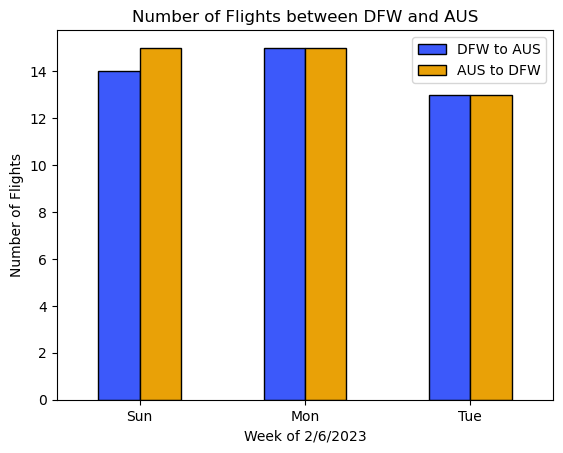

In [12]:
# Flight Data

data = {'DFW to AUS': [14, 15, 13], 'AUS to DFW': [15, 15, 13]}
index = ['Sun', 'Mon', 'Tue']

df = pd.DataFrame(data, index=index)

df.plot.bar(color=['#3C59FA', '#E9A107'], edgecolor='black')
plt.xlabel('Week of 2/6/2023')
plt.ylabel('Number of Flights')
plt.title('Number of Flights between DFW and AUS')
plt.xticks(rotation=0)
plt.savefig('Flights.png')



In [13]:
#Track Data
file = "./Texas_Railroads.geojson"
track_data = gpd.read_file(file)
#Read track url into dataframe

# Create a GeoDataFrame from the track_data
gdf = gpd.GeoDataFrame(track_data, geometry='geometry')


#Filter out irrelevant tracks
gdf = gdf[(gdf["GID"] == 8359) 
          | (gdf["GID"] == 11743) 
          | (gdf["GID"] == 8263) 
          | (gdf["GID"] == 10209) 
          | (gdf["GID"] == 12792) 
          | (gdf["GID"] == 3255)
          | (gdf["GID"] == 11098) 
          | (gdf["GID"] == 11714) 
          | (gdf["GID"] == 12439) 
          | (gdf["GID"] == 12741)
          | (gdf["GID"] == 13101) 
          | (gdf["GID"] == 5689) 
          | (gdf["GID"] == 10811)
          | (gdf["GID"] == 12063)
          | (gdf["GID"] == 12792)
          | (gdf["GID"] == 8629)
          | (gdf["GID"] == 12511)
          | (gdf["GID"] == 10922)
          | (gdf["GID"] == 10814)
            | (gdf["GID"] == 10211)
          | (gdf["GID"] == 10922)
          | (gdf["GID"] == 12792)
          | (gdf["GID"] == 7396)
          | (gdf["GID"] == 11743)
          | (gdf["GID"] == 13116)
          ]

#Create Map of Texas
track_map = folium.Map(location=[31,-95], zoom_start=7, tiles="Stamen Terrain")
folium.GeoJson(
    gdf
).add_to(track_map)

#Add markers to map indicating Dallas Fort Worth  and Austin Bergstrom International Airport
#Dallas Fort Worth Field
folium.vector_layers.CircleMarker(location=[32.897480, -97.040443], radius=5,popup= "Dallas Airport", color='red', fill=True, fill_color='red').add_to(track_map)
#Austin Bergstrom International Airport
folium.vector_layers.CircleMarker(location=[30.1944444444, -97.67], radius=5,popup= "Austin Airport", color='red', fill=True, fill_color='red').add_to(track_map)
#Houston Airport
folium.vector_layers.CircleMarker(location=[29.9855555556, -95.3422222222], popup= "Houston Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)
#San Antonio Airport
folium.vector_layers.CircleMarker(location=[29.5266666667, -98.4719444444], popup= "San Antonio Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)
#Dallas Love Field
folium.vector_layers.CircleMarker(location=[32.848152 , -96.851349], popup= "Dallas Love Field Airport", radius=5, color='red', fill=True, fill_color='red').add_to(track_map)

#Display the Map

display(track_map)

track_map.save('track_map.html')


How are the cities of Austin and Dallas growing?


In [ ]:
#Census Population projections
###What are future growth projections for Austin and Dallas
#Lin Reg or Map
#

What are the existing rail lines between the two cities?
Humdata
Plot a few lines on a map


How much fuel is consumed to fly or take the Train from Dallas to Austin?


In [ ]:
#Fuel consumption of a plane vs train for x miles

#Bar chart comparing the two - fuel consumed
#Bar Chart comparing the two - CO2 emissions


How will population growth affect future fuel and CO2 emissions?
